# Applying `MCube` to multiple adult mouse brain datasets from different sources

In [1]:
set.seed(20240709)

library(MCube)
library(ggplot2)

max_cores <- 36

[1] "/import/home/share/zw/pql"

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”


In [4]:
DATA_PATH <- "/import/home/share/zw/pql/data/mouse_brain"
RESULT_PATH <- "/import/home/share/zw/pql/results/mouse_brain"

if (!dir.exists(file.path(RESULT_PATH, "visium_1"))) {
    dir.create(file.path(RESULT_PATH, "visium_1"), recursive = TRUE)
}
if (!dir.exists(file.path(RESULT_PATH, "visium_2"))) {
    dir.create(file.path(RESULT_PATH, "visium_2"), recursive = TRUE)
}
if (!dir.exists(file.path(RESULT_PATH, "ST_3D"))) {
    dir.create(file.path(RESULT_PATH, "ST_3D"), recursive = TRUE)
}

## Two 10x Visium slices

### 10x Visium Slice 1

In [ ]:
reference_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", "reference_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))
dim(reference_ST)
num_celltypes <- nrow(reference_ST)

proportion_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", paste0("prop_slice", 0, ".csv")),
    header = TRUE, row.names = 1, check.names = FALSE
))
dim(proportion_ST)

counts <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "visium_1", "counts.csv")
))
rownames(counts) <- counts[, 1]
counts[, 1] <- NULL
counts <- data.matrix(counts)
dim(counts)

coordinates <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", "3D_coordinates.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, c("x", "y")]

shuffle_idx <- sample(1:nrow(coordinates), nrow(coordinates))
write.csv(shuffle_idx, file = file.path(DATA_PATH, "visium_1", "shuffle_idx.csv"), row.names = FALSE)
shuffle_idx <- read.csv(file.path(DATA_PATH, "visium_1", "shuffle_idx.csv"), header = TRUE)[, 1]
length(unique(shuffle_idx))

coordinates_shuffle <- coordinates[shuffle_idx, ]
rownames(coordinates_shuffle) <- rownames(coordinates)
write.csv(coordinates_shuffle, file = file.path(DATA_PATH, "visium_1", "coordinates_shuffle.csv"))
coordinates_shuffle <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", "coordinates_shuffle.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))

dim(coordinates)
dim(coordinates_shuffle)

spot_effects_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", "spot_effects_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, 1]

library_size_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_1", "library_size_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, 1]

In [ ]:
# Real case

mcube_object_1 <- createMCUBE(
    counts = counts, coordinates = coordinates, 
    proportion = proportion_ST, library_size = library_size_ST, 
    covariates = NULL,
    reference = reference_ST,
    spot_effects = spot_effects_ST, platform_effects = NULL,
    project = "mouse_brain_visium_1"
)
mcube_object_1 <- mcubeFitNull(mcube_object_1, max_cores = max_cores)
mcube_object_1 <- mcubeTest(mcube_object_1, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_1@pvalues, "combined_pvalue", nrow = 2)
p <- p +
    labs(title = "10x Visium slice 1") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
p
ggsave(
    filename = file.path(
        RESULT_PATH, "visium_1",
        paste0("pvalue_qqplot.png")
    ),
    plot = p, width = 12, height = 7
)

In [7]:
saveRDS(
    mcube_object_1,
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("mcube", ".rds")
    )
)
# mcube_object_1 <- readRDS(
#     file = file.path(
#         RESULT_PATH, "visium_1",
#         paste0("mcube", ".rds")
#     )
# )

In [ ]:
# Negative control

mcube_object_null_1 <- mcube_object_1
mcube_object_null_1@coordinates <- coordinates_shuffle
mcube_object_null_1 <- mcubeTest(mcube_object_null_1, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_null_1@pvalues, "combined_pvalue", nrow = 2, under_null = TRUE)
p <- p +
    labs(title = "10x Visium slice 1") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
p
ggsave(
    filename = file.path(
        RESULT_PATH, "visium_1", 
        paste0("pvalue_qqplot_null.png")),
    plot = p, width = 12, height = 7
)

In [9]:
pvalues_null_1 <- mcube_object_null_1@pvalues
rm(mcube_object_null_1)
saveRDS(
    pvalues_null_1,
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("mcube_pvalues_null", ".rds")
    )
)
# pvalues_null_1 <- readRDS(
#     file = file.path(
#         RESULT_PATH, "visium_1",
#         paste0("mcube_pvalues_null", ".rds")
#     )
# )

### 10x Visium Slice 2

In [ ]:
reference_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", "reference_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))
dim(reference_ST)
num_celltypes <- nrow(reference_ST)

proportion_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", paste0("prop_slice", 0, ".csv")),
    header = TRUE, row.names = 1, check.names = FALSE
))
dim(proportion_ST)

counts <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "visium_2", "counts.csv")
))
rownames(counts) <- counts[, 1]
counts[, 1] <- NULL
counts <- data.matrix(counts)
dim(counts)

coordinates <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", "3D_coordinates.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, c("x", "y")]

shuffle_idx <- sample(1:nrow(coordinates), nrow(coordinates))
write.csv(shuffle_idx, file = file.path(DATA_PATH, "visium_2", "shuffle_idx.csv"), row.names = FALSE)
shuffle_idx <- read.csv(file.path(DATA_PATH, "visium_2", "shuffle_idx.csv"), header = TRUE)[, 1]
length(unique(shuffle_idx))

coordinates_shuffle <- coordinates[shuffle_idx, ]
rownames(coordinates_shuffle) <- rownames(coordinates)
write.csv(coordinates_shuffle, file = file.path(DATA_PATH, "visium_2", "coordinates_shuffle.csv"))
coordinates_shuffle <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", "coordinates_shuffle.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))

dim(coordinates)
dim(coordinates_shuffle)

spot_effects_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", "spot_effects_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, 1]

library_size_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "visium_2", "library_size_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[, 1]

In [ ]:
# Real case

mcube_object_2 <- createMCUBE(
    counts = counts, coordinates = coordinates, 
    proportion = proportion_ST, library_size = library_size_ST, 
    covariates = NULL,
    reference = reference_ST,
    spot_effects = spot_effects_ST, platform_effects = NULL,
    project = "mouse_brain_visium_2"
)
mcube_object_2 <- mcubeFitNull(mcube_object_2, max_cores = max_cores)
mcube_object_2 <- mcubeTest(mcube_object_2, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_2@pvalues, "combined_pvalue", nrow = 2)
p <- p +
    labs(title = "10x Visium slice 2") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
p
ggsave(
    filename = file.path(
        RESULT_PATH, "visium_2",
        paste0("pvalue_qqplot.png")),
    plot = p, width = 12, height = 7
)

In [12]:
saveRDS(
    mcube_object_2,
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("mcube", ".rds")
    )
)
# mcube_object_2 <- readRDS(
#     file = file.path(
#         RESULT_PATH, "visium_2",
#         paste0("mcube", ".rds")
#     )
# )

In [ ]:
# Negative control

mcube_object_null_2 <- mcube_object_2
mcube_object_null_2@coordinates <- coordinates_shuffle
mcube_object_null_2 <- mcubeTest(mcube_object_null_2, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_null_2@pvalues, "combined_pvalue", nrow = 2, under_null = TRUE)
p <- p +
    labs(title = "10x Visium slice 2") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
p
ggsave(
    filename = file.path(
        RESULT_PATH, "visium_2", 
        paste0("pvalue_qqplot_null.png")),
    plot = p, width = 12, height = 7
)

pvalues_null_2 <- mcube_object_null_2@pvalues
rm(mcube_object_null_2)
saveRDS(
    pvalues_null_2,
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("mcube_pvalues_null", ".rds")
    )
)
# pvalues_null_2 <- readRDS(
#     file = file.path(
#         RESULT_PATH, "visium_2",
#         paste0("mcube_pvalues_null", ".rds")
#     )
# )

### Comparing the results of two slices

In [14]:
mcube_object_1 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("mcube", ".rds")
    )
)
mcube_object_2 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("mcube", ".rds")
    )
)

pvalues_null_1 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_1",
        paste0("mcube_pvalues_null", ".rds")
    )
)
pvalues_null_2 <- readRDS(
    file = file.path(
        RESULT_PATH, "visium_2",
        paste0("mcube_pvalues_null", ".rds")
    )
)

In [15]:
# For visualization
mcube_object_1@coordinates[, "y"] <- -mcube_object_1@coordinates[, "y"] + sum(range(mcube_object_1@coordinates[, "y"]))
mcube_object_2@coordinates[, "y"] <- -mcube_object_2@coordinates[, "y"] + sum(range(mcube_object_2@coordinates[, "y"]))

#### $P$-values

In [16]:
pvalues_all <- merge(
    do.call(
        rbind,
        lapply(
            names(mcube_object_1@pvalues),
            FUN = function(x) {
                pvalues_x <- mcubeQQPlotDF(mcube_object_1@pvalues[[x]])
                pvalues_x$celltype <- x
                return(pvalues_x)
            }
        )
    ),
    do.call(
        rbind,
        lapply(
            names(mcube_object_2@pvalues),
            FUN = function(x) {
                pvalues_x <- mcubeQQPlotDF(mcube_object_2@pvalues[[x]])
                pvalues_x$celltype <- x
                return(pvalues_x)
            }
        )
    ),
    by = c("gene", "celltype"),
    suffixes = c("_slice_1", "_slice_2")
)

In [ ]:
p <- ggplot(data = pvalues_all, aes(x = -log10(pvalue_slice_1), y = -log10(pvalue_slice_2))) +
    geom_point(aes(color = celltype), size = 5, alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", linewidth = 2) +
    scale_x_continuous(limits = c(0, 17), oob = scales::oob_squish) +
    scale_y_continuous(limits = c(0, 17), oob = scales::oob_squish) +
    coord_fixed(ratio = 1) +
    facet_wrap(. ~ celltype, nrow = 1) +
    labs(
        title = expression(paste("-log"[10], plain("P"), " comparison")),
        x = "Slice 1", y = "Slice 2"
    ) +
    theme_classic() +
        theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20),
            axis.title = element_text(size = 20),
            axis.text.x = element_text(size = 16),
            axis.text.y = element_text(size = 16),
            legend.position = "none"
        )
ggsave(
    filename = file.path(RESULT_PATH, paste0("pvalue_comparison", ".pdf")),
    plot = p, width = 15, height = 3
)
p

#### Cell type Ext_Thal_1

In [20]:
celltype <- "Ext_Thal_1"

p1 <- mcubePlotPropCellType(mcube_object_1@proportion, mcube_object_1@coordinates, celltype) +
    labs(title = paste(celltype, "in slice 1")) +
    theme(
        text = element_text(size = 1, hjust = 0.5),
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none"
    )

In [ ]:
celltype <- "Ext_Thal_1"

p1 <- mcubePlotPropCellType(mcube_object_1@proportion, mcube_object_1@coordinates, celltype) +
    labs(title = paste(celltype, "in slice 1")) +
    theme(
        text = element_text(size = 1, hjust = 0.5),
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, paste0("proportion_", celltype, "_slice_1", ".pdf")),
    plot = p1, width = 4, height = 4
)

p2 <- mcubePlotPropCellType(mcube_object_2@proportion, mcube_object_2@coordinates, celltype) +
    labs(title = paste(celltype, "in slice 2")) +
    theme(
        text = element_text(size = 1, hjust = 0.5),
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, paste0("proportion_", celltype, "_slice_2", ".pdf")),
    plot = p2, width = 4, height = 4
)

p1
p2

In [ ]:
minus_log10p_max <- 5
pvalues_plot_df <- rbind(
    data.frame(
        mcubeQQPlotDF(pvalues_null_1[[celltype]], minus_log10p_max = 5),
        slice = "Slice 1",
        case = "Negative control"
    ),
    data.frame(
        mcubeQQPlotDF(pvalues_null_2[[celltype]], minus_log10p_max = 5),
        slice = "Slice 2",
        case = "Negative control"
    ),
    data.frame(
        mcubeQQPlotDF(mcube_object_1@pvalues[[celltype]], minus_log10p_max = 5),
        slice = "Slice 1",
        case = "Real case"
    ),
    data.frame(
        mcubeQQPlotDF(mcube_object_2@pvalues[[celltype]], minus_log10p_max = 5),
        slice = "Slice 2",
        case = "Real case"
    )
)
pvalues_plot_df$case <- factor(pvalues_plot_df$case, levels = c("Real case", "Negative control"))

head(pvalues_plot_df[(pvalues_plot_df$slice == "Slice 1") & (pvalues_plot_df$case == "Real case"), ])
head(pvalues_plot_df[(pvalues_plot_df$slice == "Slice 2") & (pvalues_plot_df$case == "Real case"), ])

In [23]:
# demo_genes <- c("Pcp4", "Cplx1")
demo_genes <- c("Pcp4", "Nrxn3")
demo_genes_df <- pvalues_plot_df[(pvalues_plot_df$gene %in% demo_genes) & (pvalues_plot_df$case == "Real case"), ]

In [ ]:
expected_minus_log10p_lab <- expression(paste("Expected -log"[10], plain(P)))
observed_minus_log10p_lab <- expression(paste("Observed -log"[10], plain(P)))

p <- ggplot(data = pvalues_plot_df, aes(x = minus_log10p_theoretical, y = minus_log10p)) +
    geom_point(aes(color = case), size = 5, alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", linewidth = 2) +
    geom_point(data = demo_genes_df, color = "dodgerblue", size = 5, alpha = 1) +
    ggrepel::geom_text_repel(
        data = demo_genes_df, aes(label = gene), 
        color = "dodgerblue", size = 5, fontface = "bold.italic",
        direction = "y", vjust = 0, hjust = 1, point.size = 5
    ) +
    labs(
        title = celltype,
        x = expected_minus_log10p_lab, y = observed_minus_log10p_lab
    ) +
    facet_wrap(. ~ slice, nrow = 1) +
    theme_classic() +
    theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5),
            axis.title = element_text(size = 20),
            axis.text.x = element_text(size = 16),
            axis.text.y = element_text(size = 16),
            strip.text = element_text(size = 16),
            legend.title = element_blank(),
            legend.text = element_text(size = 16),
            legend.position = "bottom"
        )
ggsave(
    filename = file.path(RESULT_PATH, paste0("pvalue_qqplot_", celltype, ".pdf")),
    plot = p, width = 6, height = 5
)
p

In [26]:
for (gene in demo_genes) {
    p1 <- mcubePlotExprCellTypeBinary(
        mcube_object_1,
        celltype = celltype, gene = gene, background = TRUE, 
        opacity_target = 1, opacity_background = 0.5,
    ) +
        labs(title = gene) +
        theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5, face = "italic"),
            axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            legend.position = "none"
        )
    ggsave(
        filename = file.path(RESULT_PATH, paste0(celltype, "_", gene, "_slice_1", ".pdf")),
        plot = p1, width = 4, height = 4
    )

    p2 <- mcubePlotExprCellTypeBinary(
        mcube_object_2,
        celltype = celltype, gene = gene, background = TRUE, 
        opacity_target = 1, opacity_background = 0.5,
    ) +
        labs(title = gene) +
        theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5, face = "italic"),
            axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            legend.position = "none"
        )
    ggsave(
        filename = file.path(RESULT_PATH, paste0(celltype, "_", gene, "_slice_2", ".pdf")),
        plot = p2, width = 4, height = 4
    )
}

#### Cell type Inh_1

In [ ]:
celltype <- "Inh_1"

p1 <- mcubePlotPropCellType(mcube_object_1@proportion, mcube_object_1@coordinates, celltype) +
    labs(title = paste(celltype, "in slice 1")) +
    theme(
        text = element_text(size = 1, hjust = 0.5),
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, paste0("proportion_", celltype, "_slice_1", ".pdf")),
    plot = p1, width = 4, height = 4
)

p2 <- mcubePlotPropCellType(mcube_object_2@proportion, mcube_object_2@coordinates, celltype) +
    labs(title = paste(celltype, "in slice 2")) +
    theme(
        text = element_text(size = 1, hjust = 0.5),
        plot.title = element_text(size = 20, hjust = 0.5),
        axis.title = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        legend.position = "none"
    )
ggsave(
    filename = file.path(RESULT_PATH, paste0("proportion_", celltype, "_slice_2", ".pdf")),
    plot = p2, width = 4, height = 4
)

p1
p2

In [ ]:
minus_log10p_max <- 5
pvalues_plot_df <- rbind(
    data.frame(
        mcubeQQPlotDF(pvalues_null_1[[celltype]], minus_log10p_max = 5),
        slice = "Slice 1",
        case = "Negative control"
    ),
    data.frame(
        mcubeQQPlotDF(pvalues_null_2[[celltype]], minus_log10p_max = 5),
        slice = "Slice 2",
        case = "Negative control"
    ),
    data.frame(
        mcubeQQPlotDF(mcube_object_1@pvalues[[celltype]], minus_log10p_max = 5),
        slice = "Slice 1",
        case = "Real case"
    ),
    data.frame(
        mcubeQQPlotDF(mcube_object_2@pvalues[[celltype]], minus_log10p_max = 5),
        slice = "Slice 2",
        case = "Real case"
    )
)
pvalues_plot_df$case <- factor(pvalues_plot_df$case, levels = c("Real case", "Negative control"))

head(pvalues_plot_df[(pvalues_plot_df$slice == "Slice 1") & (pvalues_plot_df$case == "Real case"), ])
head(pvalues_plot_df[(pvalues_plot_df$slice == "Slice 2") & (pvalues_plot_df$case == "Real case"), ])

In [29]:
# demo_genes <- c("Pmch", "Gal") # Camk2d, Slc32a1, Unc13c
demo_genes <-c("Calb1", "Nsf")
demo_genes_df <- pvalues_plot_df[(pvalues_plot_df$gene %in% demo_genes) & (pvalues_plot_df$case == "Real case"), ]

In [ ]:
p <- ggplot(data = pvalues_plot_df, aes(x = minus_log10p_theoretical, y = minus_log10p)) +
    geom_point(aes(color = case), size = 5, alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", linewidth = 2) +
    geom_point(data = demo_genes_df, color = "dodgerblue", size = 5, alpha = 1) +
    ggrepel::geom_text_repel(
        data = demo_genes_df, aes(label = gene), 
        color = "dodgerblue", size = 5, fontface = "bold.italic",
        direction = "y", vjust = 0, hjust = -0.5, point.size = 5
    ) +
    labs(
        title = celltype,
        x = expected_minus_log10p_lab, y = observed_minus_log10p_lab
    ) +
    facet_wrap(. ~ slice, nrow = 1) +
    theme_classic() +
    theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5),
            axis.title = element_text(size = 20),
            axis.text.x = element_text(size = 16),
            axis.text.y = element_text(size = 16),
            strip.text = element_text(size = 16),
            legend.title = element_blank(),
            legend.text = element_text(size = 16),
            legend.position = "bottom"
        )
ggsave(
    filename = file.path(RESULT_PATH, paste0("pvalue_qqplot_", celltype, ".pdf")),
    plot = p, width = 6, height = 5
)
p

In [31]:
for (gene in demo_genes) {
    p1 <- mcubePlotExprCellTypeBinary(
        mcube_object_1,
        celltype = celltype, gene = gene, background = TRUE,
        opacity_target = 1, opacity_background = 0.5,
    ) +
        labs(title = gene) +
        theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5, face = "italic"),
            axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            legend.position = "none"
        )
    ggsave(
        filename = file.path(RESULT_PATH, paste0(celltype, "_", gene, "_slice_1", ".pdf")),
        plot = p1, width = 4, height = 4
    )

    p2 <- mcubePlotExprCellTypeBinary(
        mcube_object_2,
        celltype = celltype, gene = gene, background = TRUE,
        opacity_target = 1, opacity_background = 0.5,
    ) +
        labs(title = gene) +
        theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5, face = "italic"),
            axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks = element_blank(),
            legend.position = "none"
        )
    ggsave(
        filename = file.path(RESULT_PATH, paste0(celltype, "_", gene, "_slice_2", ".pdf")),
        plot = p2, width = 4, height = 4
    )
}

In [32]:
rm(mcube_object_1, mcube_object_2, pvalues_null_1, pvalues_null_2)

## 3D model constructed from Spatial Transcriptomics dataset

In [5]:
n_slices <- 35
slice_idx_seq <- c(1:n_slices)

reference_ST <- data.matrix(
    read.csv(file.path(DATA_PATH, "ST_3D", "reference_ST.csv"),
        header = TRUE, row.names = 1, check.names = FALSE
    )
)
dim(reference_ST)
num_celltypes <- nrow(reference_ST)

proportion_ST <- matrix(, nrow = 0, ncol = num_celltypes)
batch_id <- vector("character")
for(slice_idx in slice_idx_seq){
    proportion_i <- as.matrix(read.csv(
        file.path(
            DATA_PATH, "ST_3D",
            paste0("prop_slice", slice_idx - 1, ".csv")
        ),
        header = TRUE, row.names = 1, check.names = FALSE
    ))
    proportion_ST <- rbind(proportion_ST, proportion_i)
    batch_id <- c(batch_id, rep(paste0("slice", slice_idx - 1), nrow(proportion_i)))
}
dim(proportion_ST)
num_spots <- nrow(proportion_ST)
spots <- rownames(proportion_ST)
names(batch_id) <- spots


counts <- as.data.frame(readr::read_csv(
    file.path(DATA_PATH, "ST_3D", "counts.csv")
))
rownames(counts) <- counts[, 1]
counts[, 1] <- NULL
counts <- counts[spots, ]
counts <- data.matrix(counts)
dim(counts)

coordinates <- as.matrix(read.csv(
    file.path(DATA_PATH, "ST_3D", "3D_coordinates.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))

shuffle_idx <- sample(1:nrow(coordinates), nrow(coordinates))
write.csv(shuffle_idx, file = file.path(DATA_PATH, "ST_3D", "shuffle_idx.csv"), row.names = FALSE)
shuffle_idx <- read.csv(file.path(DATA_PATH, "ST_3D", "shuffle_idx.csv"), header = TRUE)[, 1]
length(unique(shuffle_idx))

coordinates_shuffle <- coordinates[shuffle_idx, ]
rownames(coordinates_shuffle) <- rownames(coordinates)
write.csv(coordinates_shuffle, file = file.path(DATA_PATH, "ST_3D", "3D_coordinates_shuffle.csv"))
coordinates_shuffle <- as.matrix(read.csv(
    file.path(DATA_PATH, "ST_3D", "3D_coordinates_shuffle.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))

coordinates <- coordinates[spots, ]
coordinates_shuffle <- coordinates_shuffle[spots, ]
dim(coordinates)
dim(coordinates_shuffle)

spot_effects_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "ST_3D", "spot_effects_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[spots, 1]

platform_effects_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "ST_3D", "platform_effects_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))

library_size_ST <- data.matrix(read.csv(
    file.path(DATA_PATH, "ST_3D", "library_size_ST.csv"),
    header = TRUE, row.names = 1, check.names = FALSE
))[spots, 1]

[1]   59 6227

[1] 17086    59

New names:
• `` -> `...1`
Rows: 17086 Columns: 6228
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (1): ...1
dbl (6227): A230001M10Rik, A230006K03Rik, A230009B12Rik, A230065N10Rik, A230...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 17086  6227

[1] 17086

[1] 17086     3

[1] 17086     3

mcubeFilterCellTypes: Cell types Astro_AMY, Astro_AMY_CTX, Astro_CTX, Astro_HPC, Astro_HYPO, Astro_STR, Astro_THAL_hab, Astro_THAL_lat, Astro_THAL_med, Astro_WM, Endo, Ext_Amy_1, Ext_ClauPyr, Ext_Hpc_CA2, Ext_Hpc_DG2, Ext_L5_3, Ext_Unk_1, Ext_Unk_2, Ext_Unk_3, Inh_3, Inh_6, Inh_Lamp5, Inh_Meis2_1, Inh_Meis2_4, Inh_Pvalb, Inh_Sst, Inh_Vip, LowQ_1, LowQ_2, Micro, Nb_1, Nb_2, OPC_1, OPC_2, Oligo_1, Unk_1, Unk_2 have less than the minimum celltype_threshold = 100. To include these cell-types, please reduce the celltype_threshold.

mcubeFilterCellTypes: Cell types Ext_Amy_2, Ext_Hpc_CA1, Ext_Hpc_CA3, Ext_Hpc_DG1, Ext_L23, Ext_L25, Ext_L56, Ext_L5_1, Ext_L5_2, Ext_L6, Ext_L6B, Ext_Med, Ext_Pir, Ext_Thal_1, Ext_Thal_2, Inh_1, Inh_2, Inh_4, Inh_5, Inh_Meis2_2, Inh_Meis2_3, Oligo_2 pass the celltype_threshold = 100.

mcubeFilterGenes: Filter genes based on relative expression with threshold = 5e-05.

Preprocessed data description: 17086 spots, 2840 genes, and 59 cell types in total. 17065 spots

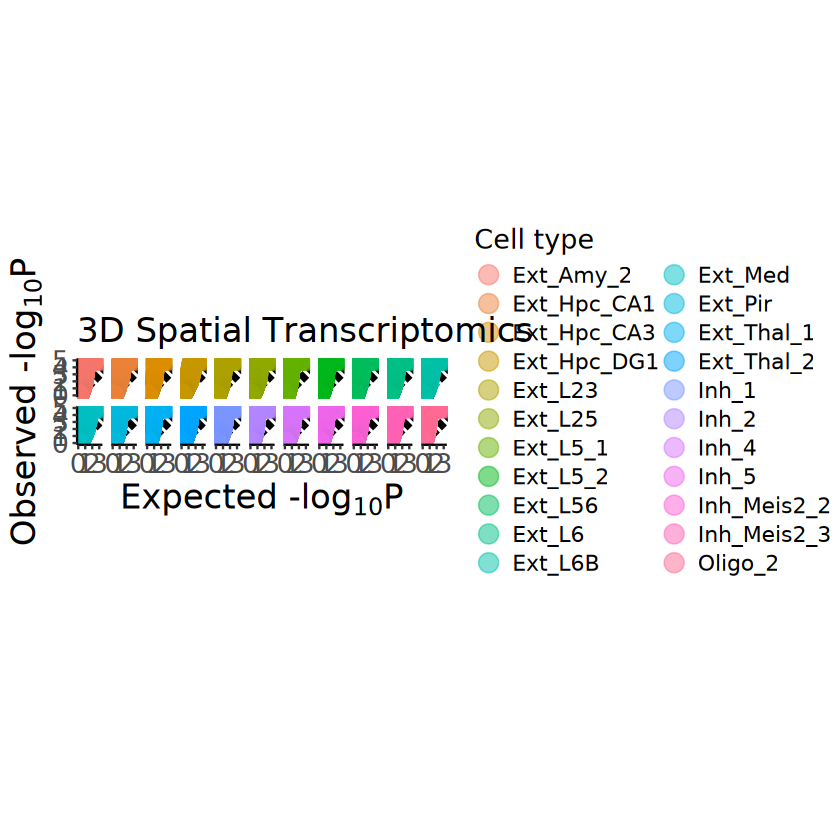

In [6]:
# Real case

mcube_object_3D <- createMCUBE(
    counts = counts, coordinates = coordinates, 
    proportion = proportion_ST, library_size = library_size_ST, 
    covariates = NULL, batch_id = batch_id,
    reference = reference_ST,
    spot_effects = spot_effects_ST, platform_effects = platform_effects_ST,
    project = "mouse_brain_3D"
)
mcube_object_3D <- mcubeFitNull(mcube_object_3D, max_cores = max_cores)
mcube_object_3D <- mcubeTest(mcube_object_3D, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_3D@pvalues, "combined_pvalue", nrow = 4)
p <- p +
    labs(title = "3D Spatial Transcriptomics") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
ggsave(
    filename = file.path(
        RESULT_PATH, "ST_3D",
        paste0("pvalue_qqplot.png")
    ),
    plot = p, width = 12, height = 12
)
p

In [7]:
saveRDS(
    mcube_object_3D,
    file = file.path(
        RESULT_PATH, "ST_3D",
        paste0("mcube", ".rds")
    )
)
# mcube_object_3D <- readRDS(
#     file = file.path(
#         RESULT_PATH, "ST_3D",
#         paste0("mcube", ".rds")
#     )
# )

mcubeKernel: length scale is set as 0.158383855293133 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.223988596216487 for the Gaussian kernel.

mcubeKernel: length scale is set as 0.158383855293133 for the Gaussian_transformed kernel.

mcubeKernel: length scale is set as 0.223988596216487 for the Gaussian_transformed kernel.

Number of cores used: 36.



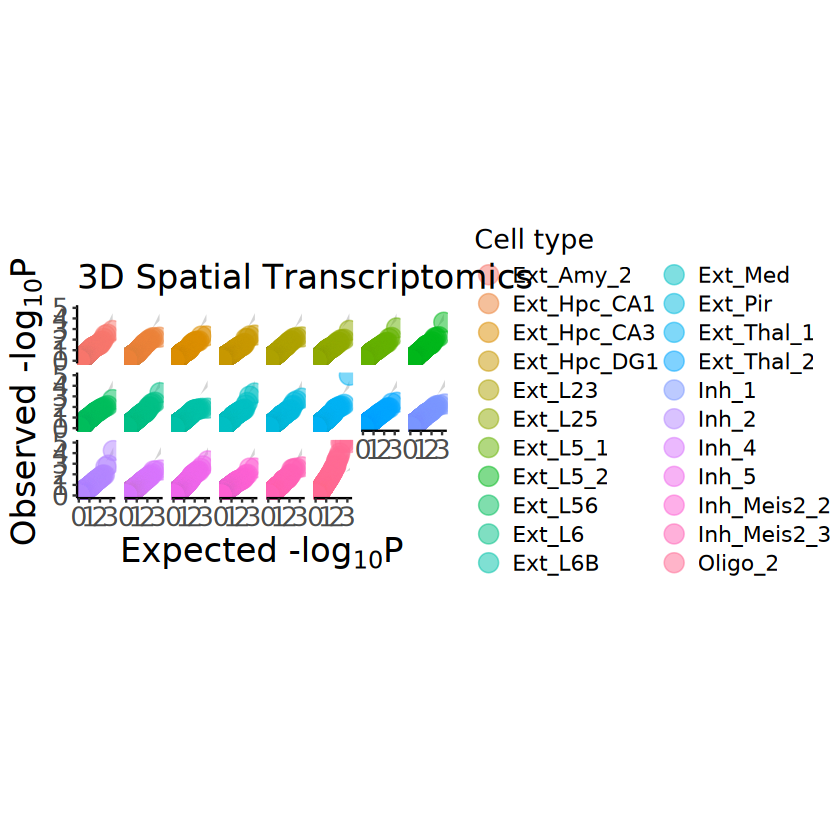

In [8]:
# Negative control

mcube_object_null_3D <- mcube_object_3D
mcube_object_null_3D@coordinates <- as.matrix(coordinates_shuffle)
mcube_object_null_3D <- mcubeTest(mcube_object_null_3D, max_cores = max_cores)

p <- mcubePlotPvalues(mcube_object_null_3D@pvalues, "combined_pvalue", nrow = 4, under_null = TRUE)
p <- p +
    labs(title = "3D Spatial Transcriptomics") +
    theme(
        text = element_text(size = 16),
        plot.title = element_text(size = 20),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16)
    )
ggsave(
    filename = file.path(
        RESULT_PATH, "ST_3D", 
        paste0("p_value_qqplot_null.png")),
    plot = p, width = 12, height = 7
)
p

In [9]:
pvalues_null_3D <- mcube_object_null_3D@pvalues
rm(mcube_object_null_3D)
saveRDS(
    pvalues_null_3D,
    file = file.path(
        RESULT_PATH, "ST_3D",
        paste0("mcube_pvalues_null", ".rds")
    )
)
# pvalues_null_3D <- readRDS(
#     file = file.path(
#         RESULT_PATH, "ST_3D",
#         paste0("mcube_pvalues_null", ".rds")
#     )
# )

In [10]:
minus_log10p_max <- 5
demo_celltypes <- c("Ext_Thal_1", "Inh_1")
pvalues_plot_df <- data.frame()
for (celltype in demo_celltypes) {
    pvalues_plot_df <- rbind(
        pvalues_plot_df,
        data.frame(
            mcubeQQPlotDF(pvalues_null_3D[[celltype]], minus_log10p_max = 5),
            case = "Negative control",
            celltype = celltype
        ),
        data.frame(
            mcubeQQPlotDF(mcube_object_3D@pvalues[[celltype]], minus_log10p_max = 5),
            case = "Real case",
            celltype = celltype
        )
    )
}
pvalues_plot_df$case <- factor(pvalues_plot_df$case, levels = c("Real case", "Negative control"))
head(pvalues_plot_df[pvalues_plot_df$case == "Real case", ])

,gene,pvalue,pvalue_theoretical,minus_log10p,minus_log10p_theoretical,case,celltype
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
775,Nsmf,7.145769e-64,0.0006459948,5,3.189771,Real case,Ext_Thal_1
776,Pcp4,2.024969e-62,0.0019379845,5,2.712650,Real case,Ext_Thal_1
777,Cplx1,2.264442e-43,0.0032299742,5,2.490801,Real case,Ext_Thal_1
778,Atp2a2,7.001029e-36,0.0045219638,5,2.344673,Real case,Ext_Thal_1
779,Gprasp1,6.894394e-31,0.0058139535,5,2.235528,Real case,Ext_Thal_1
780,Rora,6.578530e-30,0.0071059432,5,2.148378,Real case,Ext_Thal_1


In [11]:
demo_genes <- list(
    Ext_Thal_1 = c("Pcp4", "Nrxn3"),
    Inh_1 = c("Calb1", "Nsf")
)
demo_genes_df <- rbind(
    pvalues_plot_df[
        (pvalues_plot_df$celltype == demo_celltypes[1]) &
            (pvalues_plot_df$gene %in% demo_genes[[1]]) &
            (pvalues_plot_df$case == "Real case"),
    ],
    pvalues_plot_df[
        (pvalues_plot_df$celltype == demo_celltypes[2]) &
            (pvalues_plot_df$gene %in% demo_genes[[2]]) &
            (pvalues_plot_df$case == "Real case"),
    ]
)
demo_genes_df

,gene,pvalue,pvalue_theoretical,minus_log10p,minus_log10p_theoretical,case,celltype
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
776,Pcp4,2.024969e-62,0.0019379845,5,2.712650,Real case,Ext_Thal_1
787,Nrxn3,2.030183e-22,0.0161498708,5,1.791831,Real case,Ext_Thal_1
2488,Calb1,1.141357e-57,0.0005324814,5,3.273696,Real case,Inh_1
2533,Nsf,6.009241e-08,0.0484558040,5,1.314654,Real case,Inh_1


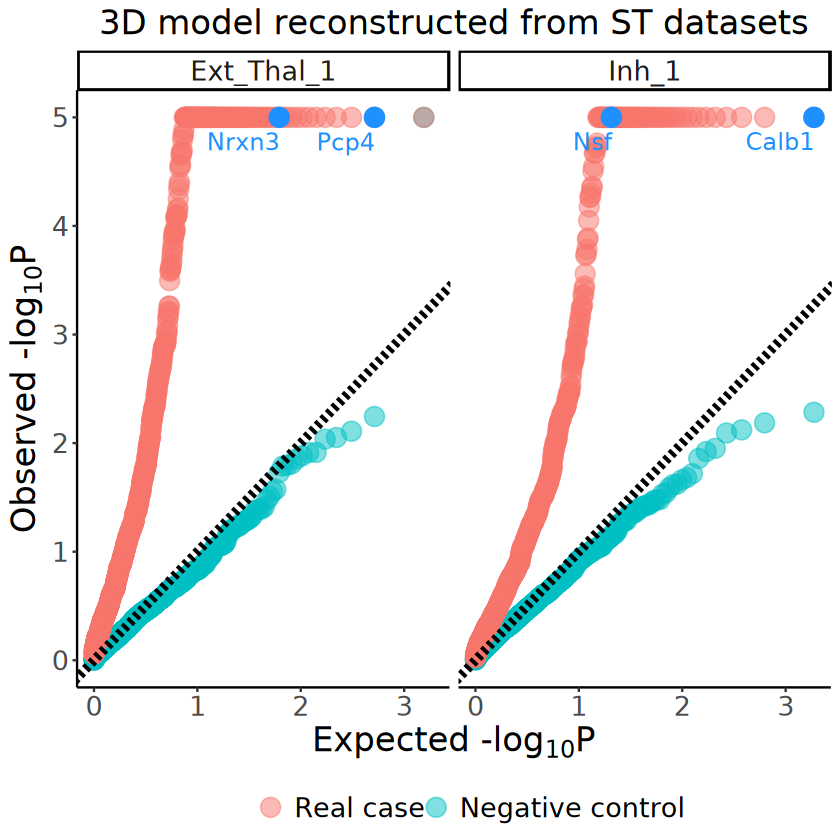

In [12]:
expected_minus_log10p_lab <- expression(paste("Expected -log"[10], plain(P)))
observed_minus_log10p_lab <- expression(paste("Observed -log"[10], plain(P)))

p <- ggplot(data = pvalues_plot_df, aes(x = minus_log10p_theoretical, y = minus_log10p)) +
    geom_point(aes(color = case), size = 5, alpha = 0.5) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", linewidth = 2) +
    geom_point(data = demo_genes_df, color = "dodgerblue", size = 5, alpha = 1) +
    ggrepel::geom_text_repel(
        data = demo_genes_df, aes(label = gene), 
        color = "dodgerblue", size = 5, fontface = "bold.italic",
        direction = "y", vjust = 0, hjust = 1, point.size = 5
    ) +
    labs(
        title = "3D model reconstructed from ST datasets",
        x = expected_minus_log10p_lab, y = observed_minus_log10p_lab
    ) +
    facet_wrap(. ~ celltype, nrow = 1) +
    theme_classic() +
    theme(
            text = element_text(size = 16),
            plot.title = element_text(size = 20, hjust = 0.5),
            axis.title = element_text(size = 20),
            axis.text.x = element_text(size = 16),
            axis.text.y = element_text(size = 16),
            strip.text = element_text(size = 16),
            legend.title = element_blank(),
            legend.text = element_text(size = 16),
            legend.position = "bottom"
        )
ggsave(
    filename = file.path(RESULT_PATH, paste0("pvalue_qqplot_3D", ".pdf")),
    plot = p, width = 6, height = 5
)
p

In [13]:
# # For saving the plotly object as a static image with `kaleido`
# install.packages('reticulate')
# reticulate::install_miniconda()
# reticulate::conda_install('r-reticulate', 'python-kaleido')
# reticulate::conda_install('r-reticulate', 'plotly', channel = 'plotly')
# reticulate::use_miniconda('r-reticulate')

In [14]:
celltype <- demo_celltypes[1]
p <- mcubePlotPropCellType3D(
    mcube_object_3D@proportion, mcube_object_3D@coordinates, celltype,
    spot_size = 1.5, opacity_background = 0.05,
    plotly_eye = list(x = 1.8, y = 0.5, z = 1.8)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0("proportion_", celltype, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)

In [15]:
gene <- demo_genes[[demo_celltypes[1]]][1]
p <- mcubePlotExprCellType3D(
    mcube_object_3D, celltype, gene,
    spot_size = 1.5, opacity_target = 0.7, opacity_background = 0.05,
    plotly_eye = list(x = 1.8, y = 0.5, z = 1.8)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0(celltype, "_", gene, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)

gene <- demo_genes[[demo_celltypes[1]]][2]
p <- mcubePlotExprCellType3D(
    mcube_object_3D, celltype, gene,
    spot_size = 1.5, opacity_target = 0.7, opacity_background = 0.05,
    plotly_eye = list(x = 1.8, y = 0.5, z = 1.8)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0(celltype, "_", gene, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)

In [16]:
celltype <- demo_celltypes[2]
p <- mcubePlotPropCellType3D(
    mcube_object_3D@proportion, mcube_object_3D@coordinates, celltype,
    spot_size = 1.5, opacity_background = 0.05,
    plotly_eye = list(x = -0.8, y = -1.2, z = 1.6)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0("proportion_", celltype, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)

In [17]:
celltype <- demo_celltypes[2]
gene <- demo_genes[[demo_celltypes[2]]][1]
p <- mcubePlotExprCellType3D(
    mcube_object_3D, celltype, gene,
    spot_size = 1.5, opacity_target = 0.7, opacity_background = 0.05,
    plotly_eye = list(x = -0.8, y = -1.2, z = 1.6)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0(celltype, "_", gene, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)

gene <- demo_genes[[demo_celltypes[2]]][2]
p <- mcubePlotExprCellType3D(
    mcube_object_3D, celltype, gene,
    spot_size = 1.5, opacity_target = 0.7, opacity_background = 0.05,
    plotly_eye = list(x = -0.8, y = -1.2, z = 1.6)
)
plotly::save_image(
    p, file.path(RESULT_PATH, paste0(celltype, "_", gene, "_3D", ".pdf")),
    width = 500, height = 500, scale = 5
)